<a href="https://colab.research.google.com/github/AinsleyJacquemain/ASTRON-1221/blob/main/Calculating_the_Hubble_Constant_for_Type_1A_Supernovae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASTRO 1221-- Dark Energy Project

This code belongs to Ainsley Jacquemain and entails a calculation for the approximate age of the universe based off distance and velocity data from Type 1A supernovae. This data, because of the luminosity and known wavelength of Type 1A supernovae, allows us to approximate the Hubble Constant using a linear data model.

My partners are Maggie Ramsey and Lisa Chiang. ☺


In [1]:
import astropy.units as u # import a Python package to call certain units.
import astropy.constants as const # import a Python package to call the value of certain constants.
import numpy as np  # import numpy package, which allows us to conduct mathematical operations for the defined quantities.
import matplotlib.pyplot as plt # import matplotlib package, which allows us to make plots.
import astropy.io.ascii # import the Python ascii package, which allows the code to read imported files.

We begin by importing the velocity and distance data collected by various Type 1A Supernovae throughout the galaxies in the universe.

In [2]:
from google.colab import files # import the file with the necessary velocity and distance measurements.
files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


{'Tonry_2003.vot': b'<?xml version="1.0" encoding="UTF-8"?>\n<VOTABLE version="1.4" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"\n  xmlns="http://www.ivoa.net/xml/VOTable/v1.3"\n  xsi:schemaLocation="http://www.ivoa.net/xml/VOTable/v1.3 http://www.ivoa.net/xml/VOTable/v1.3">\n <DESCRIPTION>\n   VizieR Astronomical Server vizier.cds.unistra.fr\n    Date: 2023-08-27T01:34:33 [V7.32.4]\n   Explanations and Statistics of UCDs:\t\t\tSee LINK below\n   In case of problem, please report to:\tcds-question@unistra.fr\n </DESCRIPTION>\n<!-- VOTable description at http://www.ivoa.net/Documents/latest/VOT.html -->\n<INFO name=\'protocol\' value=\'ASU\'/>\n<INFO name=\'request_date\' value=\'2023-08-27T01:34:33\'/>\n<INFO name=\'request_post\' value=\'https://vizier.cds.unistra.fr//viz-bin/votable\'>\n-oc.form=dec\n-out.max=1000\n-order=I\n-out.src=J/ApJ/594/1/table8\n-nav=cat:J/ApJ/594/1&amp;tab:{J/ApJ/594/1/table8}&amp;key:source=J/ApJ/594/1/table8&amp;HTTPPRM:&amp;&amp;-ref=VIZ64eaa8083

In [3]:
dat = astropy.io.ascii.read("Tonry_2003.vot") # import the ascii package, which allows the code to 'read' (process) the provided data.

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


In [4]:
velocity = 10**dat["col7"] * u.km / u.s # include the velocity data (in km/s).
# We raise 10 to the distance because the velocity values were provided in the logarithmic form.
distance = 10**dat["col8"] / 72.0 * u.mpc # include the distance data (in mpc).
# We first raise 10 to the distance because the velocity values were provided in the logarithmic form.
# We then divide by 72 to get distance from (log(dH_0)), where we assume H_0 to be 72.0.

Text(0.5, 1.0, 'Type 1A Supernovae Velocities')

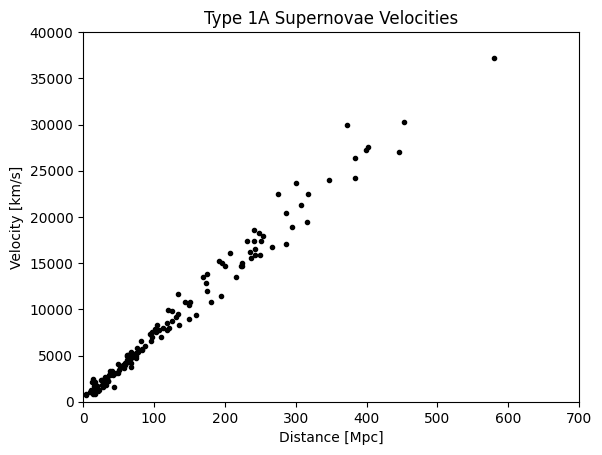

In [5]:
y = velocity.to(u.km / u.s).value # define the y-axis with the appropriate units.
x = distance.to(u.mpc).value # define the x-axis with the appropriate units.
plt.plot(x, y, marker=".", color="black", linestyle="none") # plot the individual points provided by the data.
plt.xlim(0, 700) # restrict the domain for readibilty. This the domain Professor Wang chose, and I trust him!!
plt.ylim(0, 4e4) # restrict the range for readibilty.
plt.xlabel("Distance [Mpc]") # label the x-axis.
plt.ylabel("Velocity [km/s]") # label the y-axis.
plt.title("Type 1A Supernovae Velocities") # title the plot.

With the Type 1A Supernovae data now imported, we can use the individual data points to calculate a linear model for the data. The slope of this line will be crucial to approximate the age of the universe.

In [6]:
ind = np.where((x>0) & (x<700)) # define the index ([ind]), which will restrict the data appropriately to fit the plot.
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) # define the variables to be used in the linear function.
p = np.poly1d(z) # define p as the first-order polynomial (the linear fit).
velocity_model = p(distance.to(u.mpc).value) # apply the newly-defined polynomial.
print("Slope: H[0] = ", z[0]) # print to check as you go.
print("Y-intercept: Velocity = ", z[1])

Slope: H[0] =  67.48137250840927
Y-intercept: Velocity =  355.24954905559264


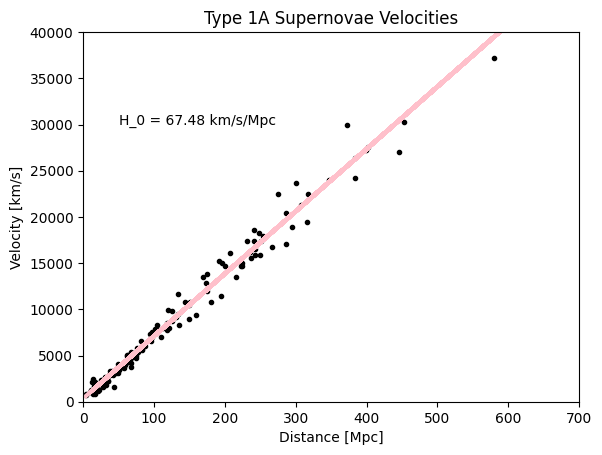

In [7]:
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") # plot the individual points provided by the data.
plt.plot(distance.to(u.mpc).value, velocity_model, color ="pink", linewidth = 3) # plot the new line-of-best-fit generated by 'z.'
plt.xlim(0, 700) #restrict the domain for readibilty.
plt.ylim(0, 4e4) #restrict the range for readibilty.
plt.xlabel("Distance [Mpc]") # label the x-axis.
plt.ylabel("Velocity [km/s]") # label the y-axis.
plt.title("Type 1A Supernovae Velocities") # title the plot.
"""
Note that the Hubble Constant is equal to the slope of the line-of-best-fit (Rate of Expansion in the Universe = Velocity / Distance).
This H_0 value is an estimated value generated from a set of data points.
"""
plt.annotate(r"H_0 = {0:5.2f} km/s/Mpc".format(z[0]), xy = (50, 30000)) # annotate the plot to include the calcuated value of the Hubble Constant.
plt.show()

The chi-square statistic is a formula to compare statistical data sets and determine the 'goodness of fit.' The lower the value, the more confident the fit of the given theoretical model (i.e. the less difference between what is observed and what is expected.) The chi-square formula is as follows:

$X^2 = \sum\frac{(O_i-C_i)^2}{σ_i^2}$

The reduced chi-square statistic is similar to the chi-square statistic, but instead takes into account the data size by dividing chi-square by the degrees of freedom. This is a 'normalized' chi-squared statistic. The reduced chi-square is as follows:

$X_v^2 = \frac{X^2}{v}$

In chi-square and reduced chi-square statistics...
*   $O$ = the observation
*   $C$ = the calculation
*   $σ$ = the measurement error
*   $v$ = the degrees of freedom = $n - m$
    *   $n$ = the number of data points used in fitting
    *   $m$ = the number of fitting parameters
        *   $m$ = 2 for a linear fit
        *   $m$ = 3 for a quadratic fit

We will calculate $X_v^2$, which we would ideally like to be close to 1 from either direction.



In [20]:
n = len(velocity) # define the number of data points used in the fit via 'len'.
m_linear = 2 # the number of fitting parameters is 2 for a linear fit.
re_chi2 = np.sum((velocity.to(u.km / u.s).value - velocity_model)**2 / np.var(velocity.to(u.km / u.s).value - velocity_model)) / (n - m_linear)
"""
Above we define the equation for the reduced chi-square for a linear fit.
(Note: np.var represents the squared deviation of a variable from its mean, or, in essense, the measurement error.
Gemini AI was used to assist with this concept, for I have not seen it before in Python.)
"""
print("Reduced Chi2 for linear fit = {:.2f}".format(re_chi2))

Reduced Chi2 for linear fit = 1.24


Since $X_v^2$, we can conclude that the linear fit is a very reasonable representation of the data. Knowing this, it is appropriate to calculate $H_0$ from the linear fit.

The Hubble Constant is a tangible representation of the relationship between distance and velocity (because $H_0 = \frac{v}{d}$, and is therefore the slope of the line-of-best-fit).

With the Hubble Constant having been approximated, we can approximate the age of the universe. There are two ways of finding it.

In [8]:
d = 1 * u.Mpc # define d, or the distance.
v = z[0] * u.km/u.s # define v, or the velocity, which is, in this instance, the Hubble Constant.

In [9]:
def CalculatingUniverseAge_1(d, v): # d and v represent the input of the function.
    t = np.divide(d, v) # define the equation for t.
    return t
t = CalculatingUniverseAge_1(d, v)
print(t.to(u.Gyr)) # define the output, which is the calculated age of the universe.

14.489809340480448 Gyr


In [10]:
H_0 = z[0] * u.km/u.s/u.Mpc # define the Hubble Constant as calculated above.
print(H_0)

67.48137250840927 km / (Mpc s)


In [11]:
def CalculatingUniverseAge_2 (H_0): # d and v represent the input of the function.
    t = 1 / H_0 # define the equation for t.
    return t
t = CalculatingUniverseAge_2(H_0)
print(t.to(u.Gyr)) # define the output, which is the calculated age of the universe.

14.489809340480448 Gyr


In [12]:
import astropy.units as u # import a Python package to call certain units.
import astropy.constants as const # import a Python package to call the value of certain constants.

These results come out to approximately 14.49 billion years, which is a reasonable calculation for the age of the universe that reflects offical values calculated by astronomers. ☺